In [110]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt

In [111]:
def euclidean(row1, row2):
    return np.sqrt(((row1-row2)**2).sum(axis = 0))

In [112]:
def stress(X,y,i):
    sum1 = 0.0
    sum2 = 0.0
    dxt = 1
    tot = 0.0000000001
    
    for j in range(len(y)):
       
        if i < j:
            dx = euclidean(X[i],X[j])
            tot += dx
            dy = euclidean(y[i],y[j])
            sum1 = ((dy - dx)**2) / dx
            #print('sum1', sum1)
            sum2 += sum1
            #print('sum2', sum2)
            dxt = 1 / tot
            #print('dxt',dxt)
        E = dxt * sum2
    return E,tot

In [113]:
def sammon(X,y,maxiter):
    dx = []
    dy = []
    E = 0.0
    sum3 = []
    c = 0.0000000001
    der1 = 0
    der2 = 0
    pard1 = 0
    pard2 = 0
    delta = []
    iter = 1
    Y = np.zeros(y.shape)
    while iter < maxiter:
        for i in range(len(y)):
            for j in range(len(y)):
                if i < j:
                    E,tot = stress(X,y,i)
                    
                    c = tot
                    
                if i != j:
                    dx = euclidean(X[i],X[j])
                    dy = euclidean(y[i],y[j])
                    sum3 = dx - dy
                    sum4 = dx * dy
                    yij = (y[i]-y[j])
                    
                    der1 += (sum3 / sum4) * yij
                    
                    der2 += ((1 / sum4)*(sum3 - (((yij**2)/dy)*(1+(sum3/dy)))))
                    
                pard1 = (-2 / c) * der1
                
                pard2 = np.abs((-2 / c) * der2)
                
                if pard2.all != 0.0:
                    delta = np.nan_to_num(np.true_divide(pard1,pard2))
                    
                else:
                    print('cannot divide by Zero')
            alpha = 0.4
            t = 0
            for t in range(len(y)):
                if t <= len(y):
                    prod = alpha * delta
                    Y[t] = np.subtract(y[t],prod)
                    
            y = Y.copy(order='k')
               
        iter += 1
        
    
    return Y

In [114]:
users = pd.read_csv('data_student.csv', delimiter=',')
users.head()
X = users[['STG', 'SCG', 'STR', 'LPR', 'PEG' ]].iloc[: , :].values
y = np.random.normal(1.0,5.0,[len(X),2])


In [115]:
pca = PCA(n_components=3)

pca_result = pca.fit_transform(X)


print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.30196292 0.24277184 0.19440398]


In [116]:
tsne = TSNE(n_components=3, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 258 samples in 0.000s...
[t-SNE] Computed neighbors for 258 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 258 / 258
[t-SNE] Mean sigma: 0.124865
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.790192
[t-SNE] KL divergence after 300 iterations: 4.125125


In [117]:
maxiter = 4
Y = sammon(X,y,maxiter)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [72]:
print("original shape:   ", X.shape)
print("transformed shape:", pca_result.shape)

original shape:    (258, 5)
transformed shape: (258, 3)


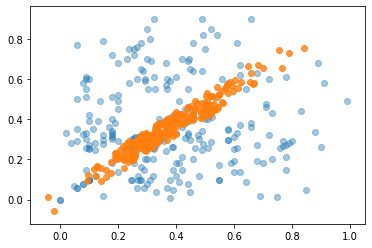

In [76]:
X_new = pca.inverse_transform(pca_result)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('tight');

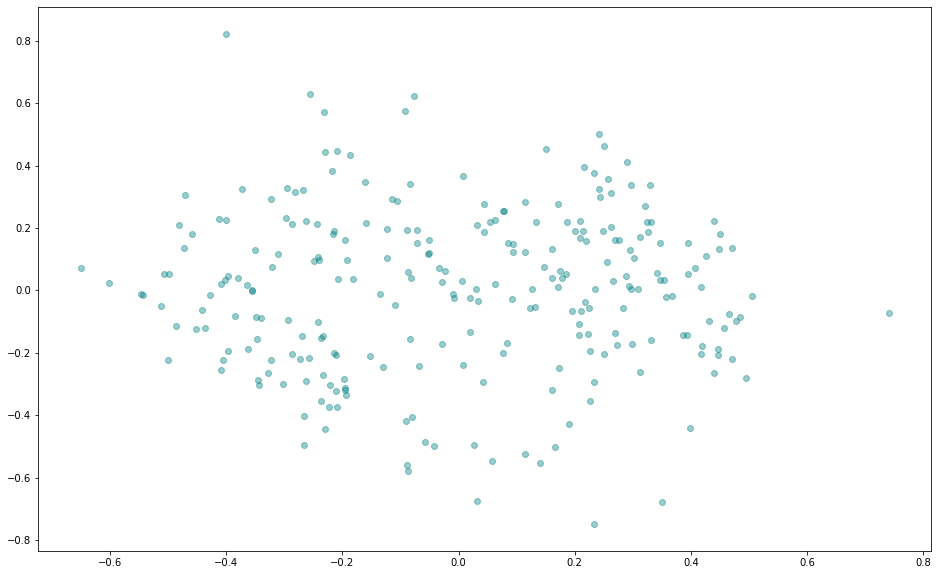

In [77]:
plt.figure(figsize=(16,10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.4, c="teal", cmap=plt.cm.get_cmap('tab20b',5))


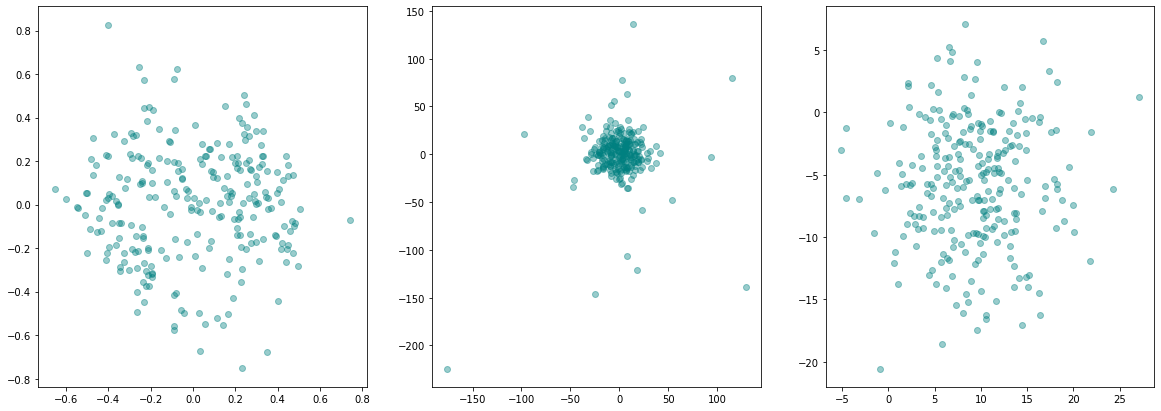

In [122]:
plt.figure(figsize=(20,7))
ax1 = plt.subplot(1, 3, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.4, c="teal", cmap=plt.cm.get_cmap('tab20b',5))

ax2 = plt.subplot(1, 3, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.4, c="teal", cmap=plt.cm.get_cmap('Pastel2',5))

ax3 = plt.subplot(1, 3, 3)
plt.scatter(Y[:,0], Y[:,1], alpha=0.4, c="teal", cmap=plt.cm.get_cmap('Dark2',5))